# Explore here

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
import pickle

In [19]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('/Users/julian/Desktop/vs code/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/data/raw/bank-marketing-campaign-data.csv', sep = ';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [20]:
# Obtener las dimensiones.
data.shape

(41188, 21)

In [21]:
# Obtener información sobre tipos de datos y valores no nulos.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Como podemos obserbar, el data set no cuenta con valores nulos.

In [22]:
# Verificar si hay duplicados y eliminarlos si los hubiese.
data.duplicated().sum()

np.int64(12)

Nos encontramos con que hay 12 filas duplicadas y pasamos a eliminarlas para convertir el data set en un data set sin duplicados

In [ ]:
# Eliminar duplicados. 

data_sin_duplicados = data.drop_duplicates(subset = data.columns)

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
#Eliminar columnas.

data_limpia = data_sin_duplicados.drop(['month', 'day_of_week'], axis = 1, inplace = False)
data_limpia.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Tambien eliminamos las columnas que consideramos que no tienen relacion con el problema. 

In [46]:
target = 'y'

### Paso 3: Análisis de variables univariante

#### Análisis sobre variables categóricas

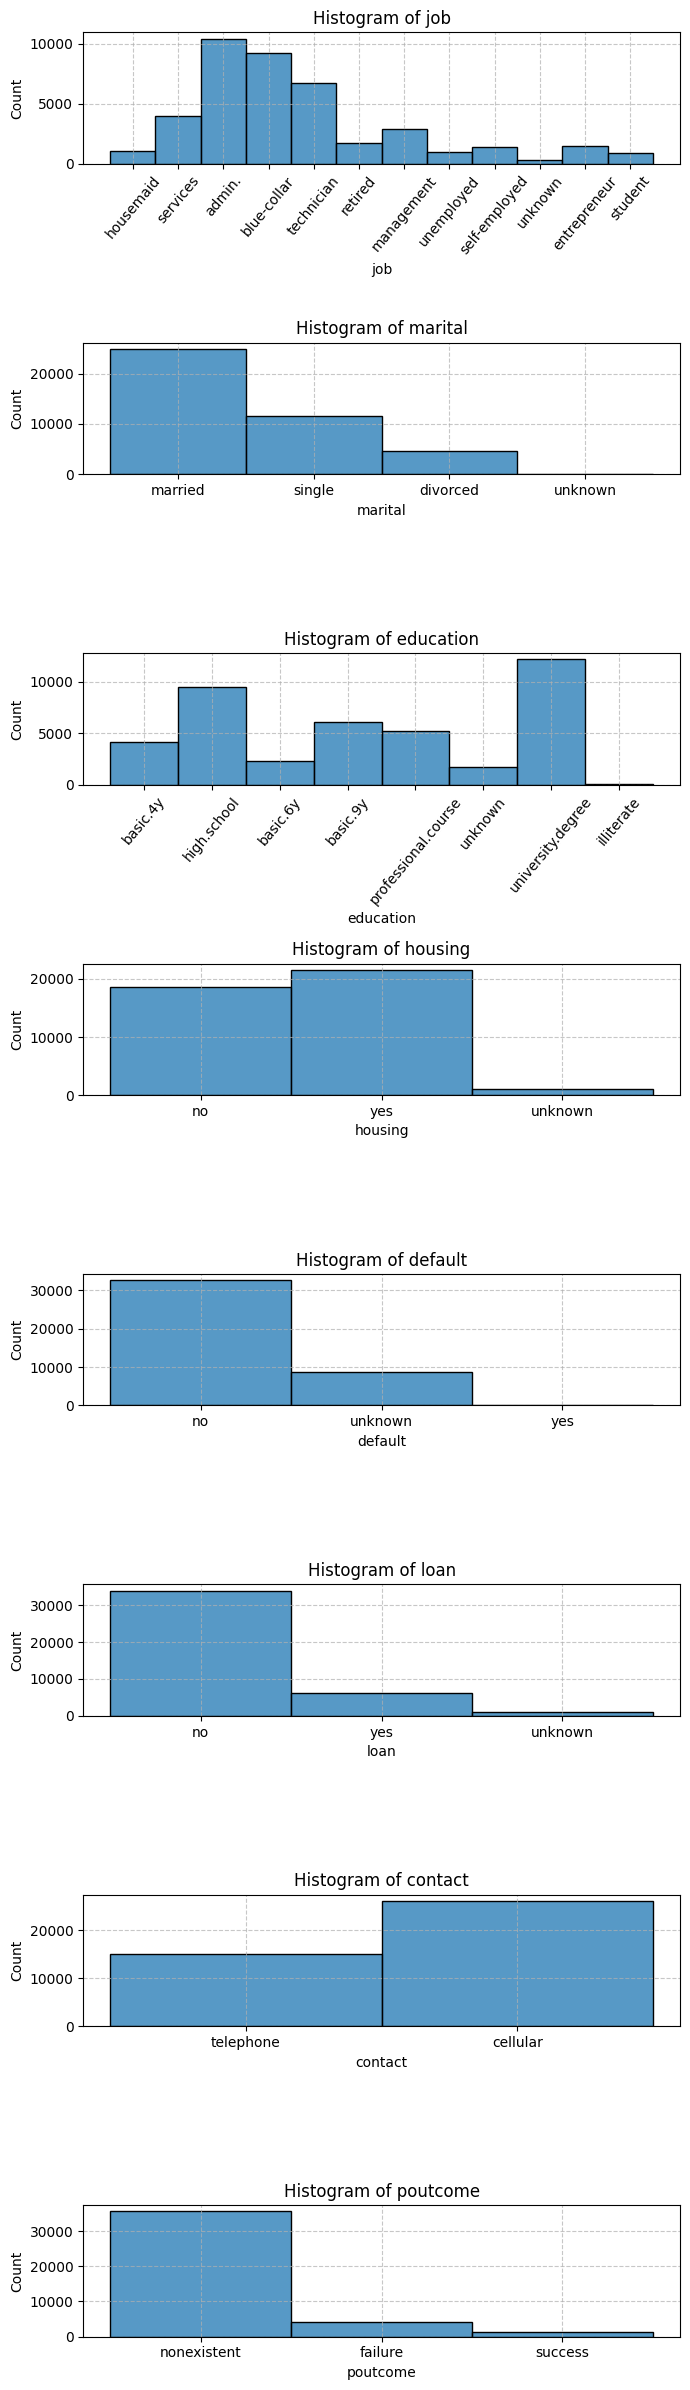

In [ ]:
categoricas_variables = ['job', 'marital', 'education', 'housing', 'default', 'loan', 'contact', 'poutcome']

def plot_categoricas(data_set, variables_categoricas):

    # Crear la figura con 1 columna y n filas, donde n es el número de variables categóricas.
    fig, axis = plt.subplots(len(variables_categoricas), 1, figsize=(7, len(variables_categoricas) * 3))

    # Iterar sobre cada columna categórica del DataFrame
    for i, col in enumerate(variables_categoricas):
        # Crear histograma para cada columna categórica.
        sns.histplot(ax = axis[i], data = data_set, x = col) 
        axis[i].set_title(f'Histogram of {col}')
        axis[i].grid(linestyle='--', alpha=0.7)
        
        # Rotación automática de las etiquetas del eje X si es necesario.

        category_counts = data_set[col].value_counts() # Contar las categorías en la columna.
        
        if len(category_counts) > 20: # Si hay más de 20 categorías, eliminar las etiquetas del eje X
            axis[i].set_xticklabels([])
        elif len(category_counts) >= 8:
            for label in axis[i].get_xticklabels(): # Si hay más de 10 categorías pero menos de 20, rotar las etiquetas del eje X
                label.set_rotation(50)

    plt.tight_layout()
    plt.show()

plot_categoricas(data_limpia, categoricas_variables)

**Análisis de las variables categoricas**

- **Job**: Los empleos que mas se repiten entre las personas del data set son: service, blue-collar, technicians y admin. 
- **marital**: La mayoria de los clientes estan casados, seguido de las personas solteras. 
- **Education**: La educacion esta repartida en varios sectores, pero predominan los estudios universitarios.
- **Default**: Podemos decir que la gran mayoria de clientes no tienen default  y solo una pequeña parte no se conoce, pero no tenemos a nadie que sepamos que si. 
- **Loan**: Mas de 35.000 de los lcientes tiene un prestamo personal.
- **Poutcome**: Casi no tenemos resultados de la campaña de marketing anterior. 


#### Análisis sobre variables numéricas

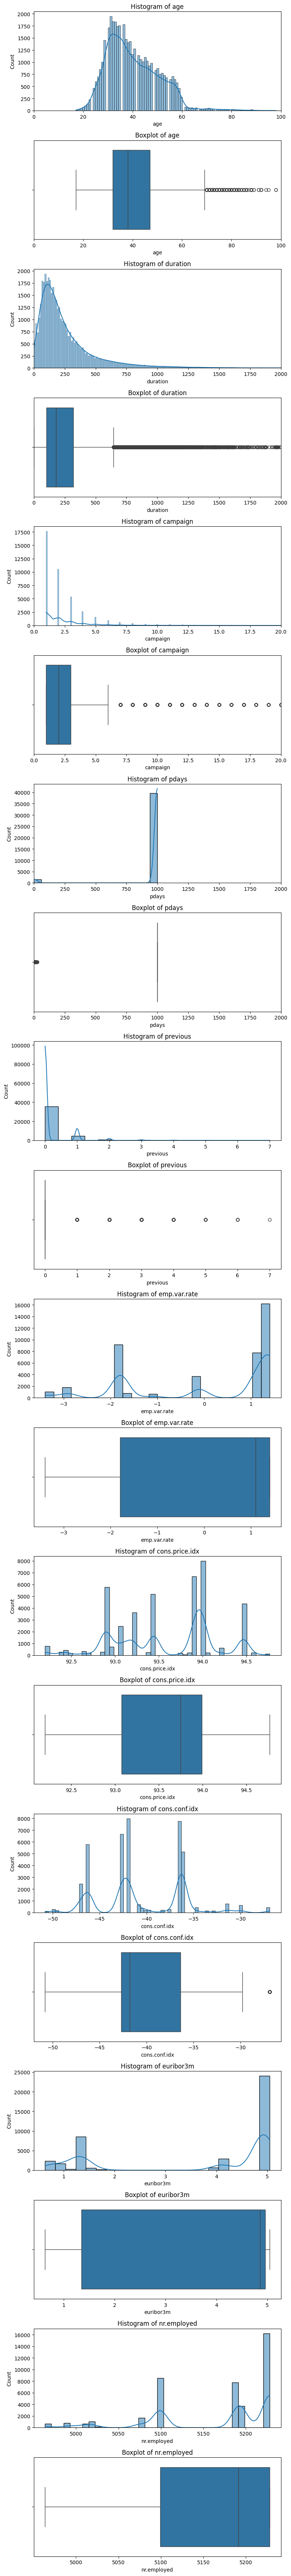

In [26]:

numericals_variables = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

def plot_numericas(data_set, variables_numericas):

    # Crear la figura con 1 columnas y 2 filas por variable.
    fig, axis = plt.subplots(len(variables_numericas) * 2, 1, figsize=(8, len(variables_numericas) * 7))

    # Definir límites de los ejes x para cada par de gráficos (histograma y boxplot).
    # RECORDAR CAMBIAR LOS NOMBRES Y PONER LOS DE LAS COLUMNAS DE DF CORRESPONDIENTE.
    x_limits = {
        'age': (0, 100),   # Rango para el histograma y el boxplot de columna1...
        'duration': (0, 2000),    
        'campaign': (0, 20), 
        'pdays': (0, 2000),
           
        # Añadir más columnas y rangos si es necesario...
    }

    # Iterar sobre cada columna del DataFrame
    for i, col in enumerate(variables_numericas):
        index = i * 2
        # Histograma en la primera fila
        sns.histplot(data = data_set, x = col, kde = True, ax = axis[index])
        axis[index].set_title(f'Histogram of {col}')
        
        # Establecer límites del eje x para el histograma
        if col in x_limits:
            axis[index].set_xlim(x_limits[col])  # Asigna el rango de valores personalizado al histograma

        # Boxplot en la segunda fila
        sns.boxplot(data = data_set, x = col, ax = axis[index + 1])
        axis[index + 1].set_title(f'Boxplot of {col}')
        
        # Establecer límites del eje x para el boxplot (mismo rango que el histograma)
        if col in x_limits:
            axis[index + 1].set_xlim(x_limits[col])  # Asigna el mismo rango de valores al boxplot

    plt.tight_layout()
    plt.show()

plot_numericas(data_limpia, numericals_variables)

**Análisis de las variables numéricas**

- **Age**: En la variable de la edad, como era de esperar, encontramos una distribucion normal pero cesgada hacia el lado izquierdo donde se encuentran los clientes mas jovenes estando entre los 35 y los 45 años el auge de la contratacion de este servicio. 
- **Duration**: En cuanto a la duracion del contacto previo podemos ver que las llamadas van desde los 0 y 10 min siendo lo más normal llamadas cortas de unos 5 min.
- **Pdays**: Pasaron 1000 dias entre una campaña y otra.  
- **emp.var.rate, cons.price.idx,cons.conf.idx**: Son variables que se mantienen estables y en constante crecimineto. 
- **cons.conf.idx**: Vemos como el indice de confianza del cliente va en aumento. 
- **euribor3m, nr.employed**: Podemos observar como el euribor y el numero de empleados crecen a la par. 

### Paso 4: Análisis de variables multivariante

#### Análisis numérico-numérico

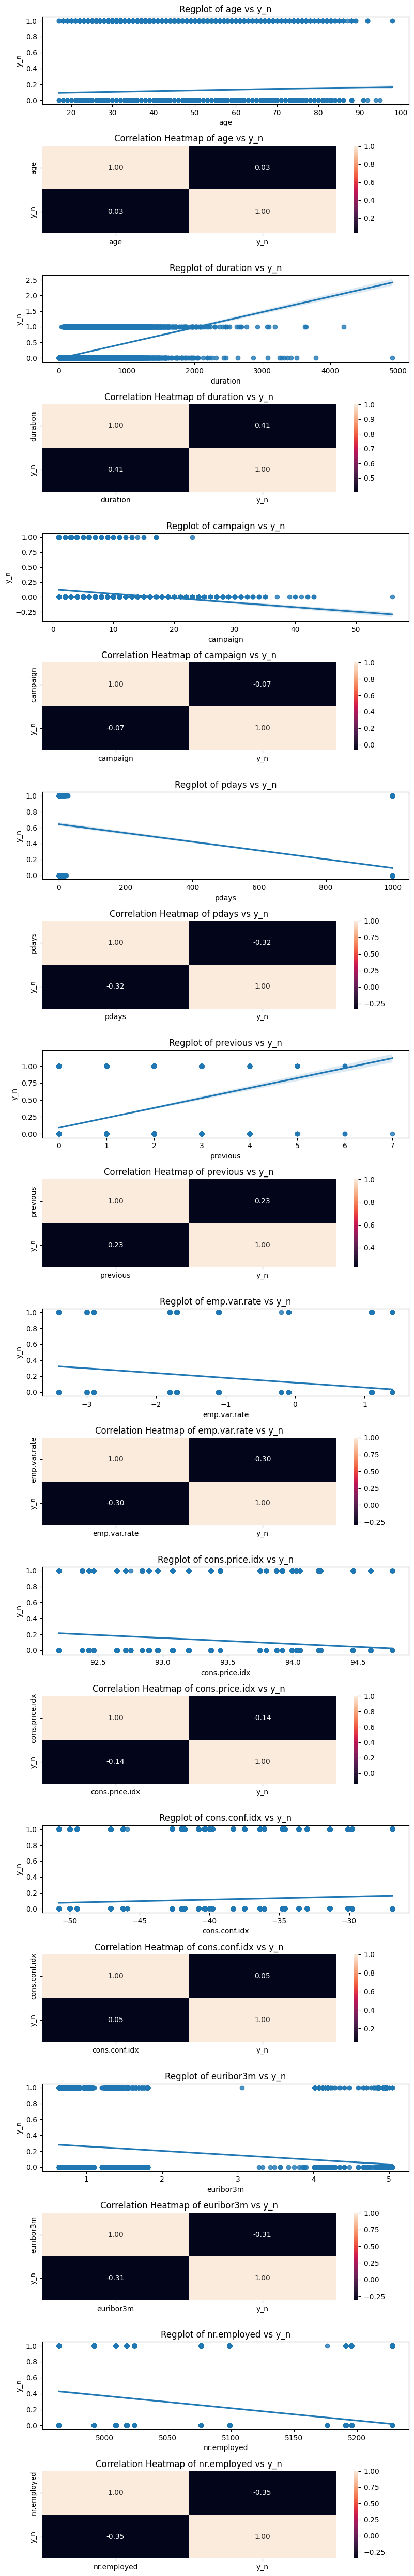

In [45]:
data_limpia["y_n"] = pd.factorize(data_limpia["y"])[0]

y_n_transformation_rules = {row["y"]: row["y_n"] for _, row in data_limpia[["y", "y_n"]].drop_duplicates().iterrows()}

with open("Y_n transformation_rules.json", "w") as f:
    json.dump(y_n_transformation_rules, f)


    
numericals_variables = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

  
def plot_numerico_numerico(data_set, variables_numericas):

    target = 'y_n' # Recordar cambiar el target.     
    
    # Crear una figura con 1 columna y 2 filas por cada variable
    fig, axis = plt.subplots(len(variables_numericas) * 2, 1, figsize=(8, (len(variables_numericas) * 5)))

    # Crear un diagrama de dispersión múltiple                
    for i, col in enumerate(variables_numericas):

        # Regplot en la primera fila (fila 2 * i)
        sns.regplot(ax = axis[i * 2], data = data_set, x = col, y = target)
        axis[i * 2].set_title(f'Regplot of {col} vs {target}')
        
        # Heatmap en la segunda fila.
        sns.heatmap(data_set[[col, target]].corr(), annot = True, fmt = ".2f", ax = axis[i * 2 + 1], cbar = True)
        axis[i * 2 + 1].set_title(f'Correlation Heatmap of {col} vs {target}')

    plt.tight_layout()
    plt.show()

plot_numerico_numerico(data_limpia, numericals_variables)

**Análisis numerico-numerico**

- **campaign vs y**: Podemos observar que los clientes que que han terminado contratando el servicio han tenido un menor numero de contactos durante la campaña. 
- **Euribor**: Tambien podemos observar una relacion negativa(aunque muy leve) entre el euribor y el target, a medida que el euribor aumentaba la contrataciones sel servicio disminuian. 

En el resto de variables no observamos relacion significativa con el target directamente, aunque si podemos observar una posible relacion entre el euribor y el numero de empleados y vamos a corroborarlo haciendo un grafico para ello. Tambien me gustaria comprobar si tienen relacion las variables de  duration y campaign. 

**Análisis de posibles relaciones entre variables numericas**

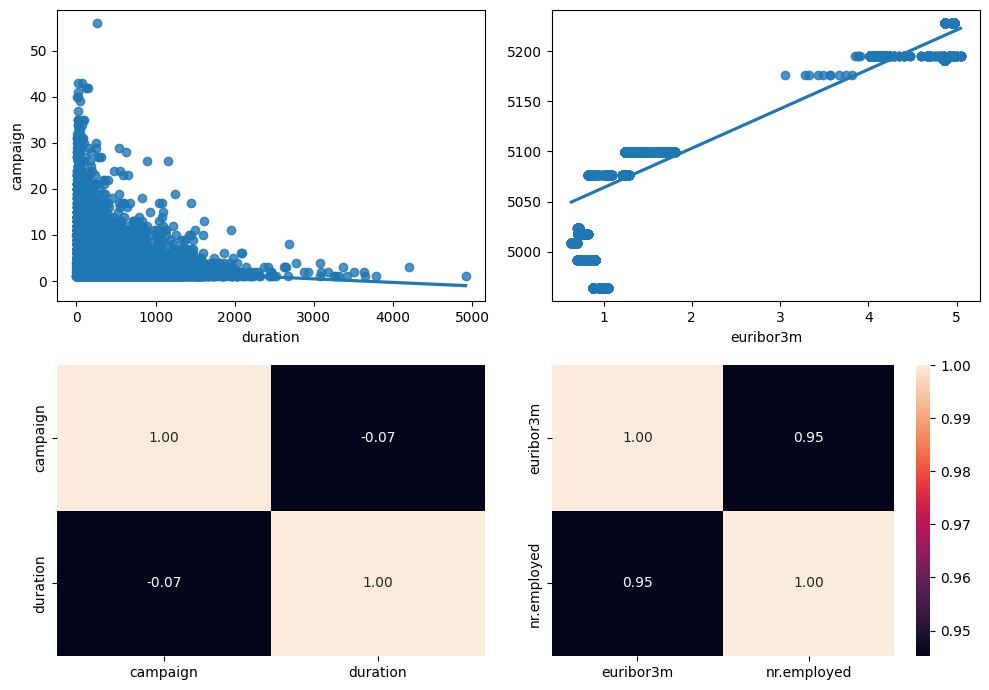

In [ ]:


fig, axis = plt.subplots(2, 2, figsize = (10, 7))  

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = data_limpia, x = "duration", y = "campaign")
sns.heatmap(data_limpia[["campaign", "duration"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = data_limpia, x = "euribor3m", y = "nr.employed").set(ylabel=None)
sns.heatmap(data_limpia[["euribor3m", "nr.employed"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

plt.tight_layout()
plt.show()

Como podemos observar hay una fuerte relacion entre la subida y el crecimineto del euribor y el numero de empleados. 

#### Análisis categórico-categórico

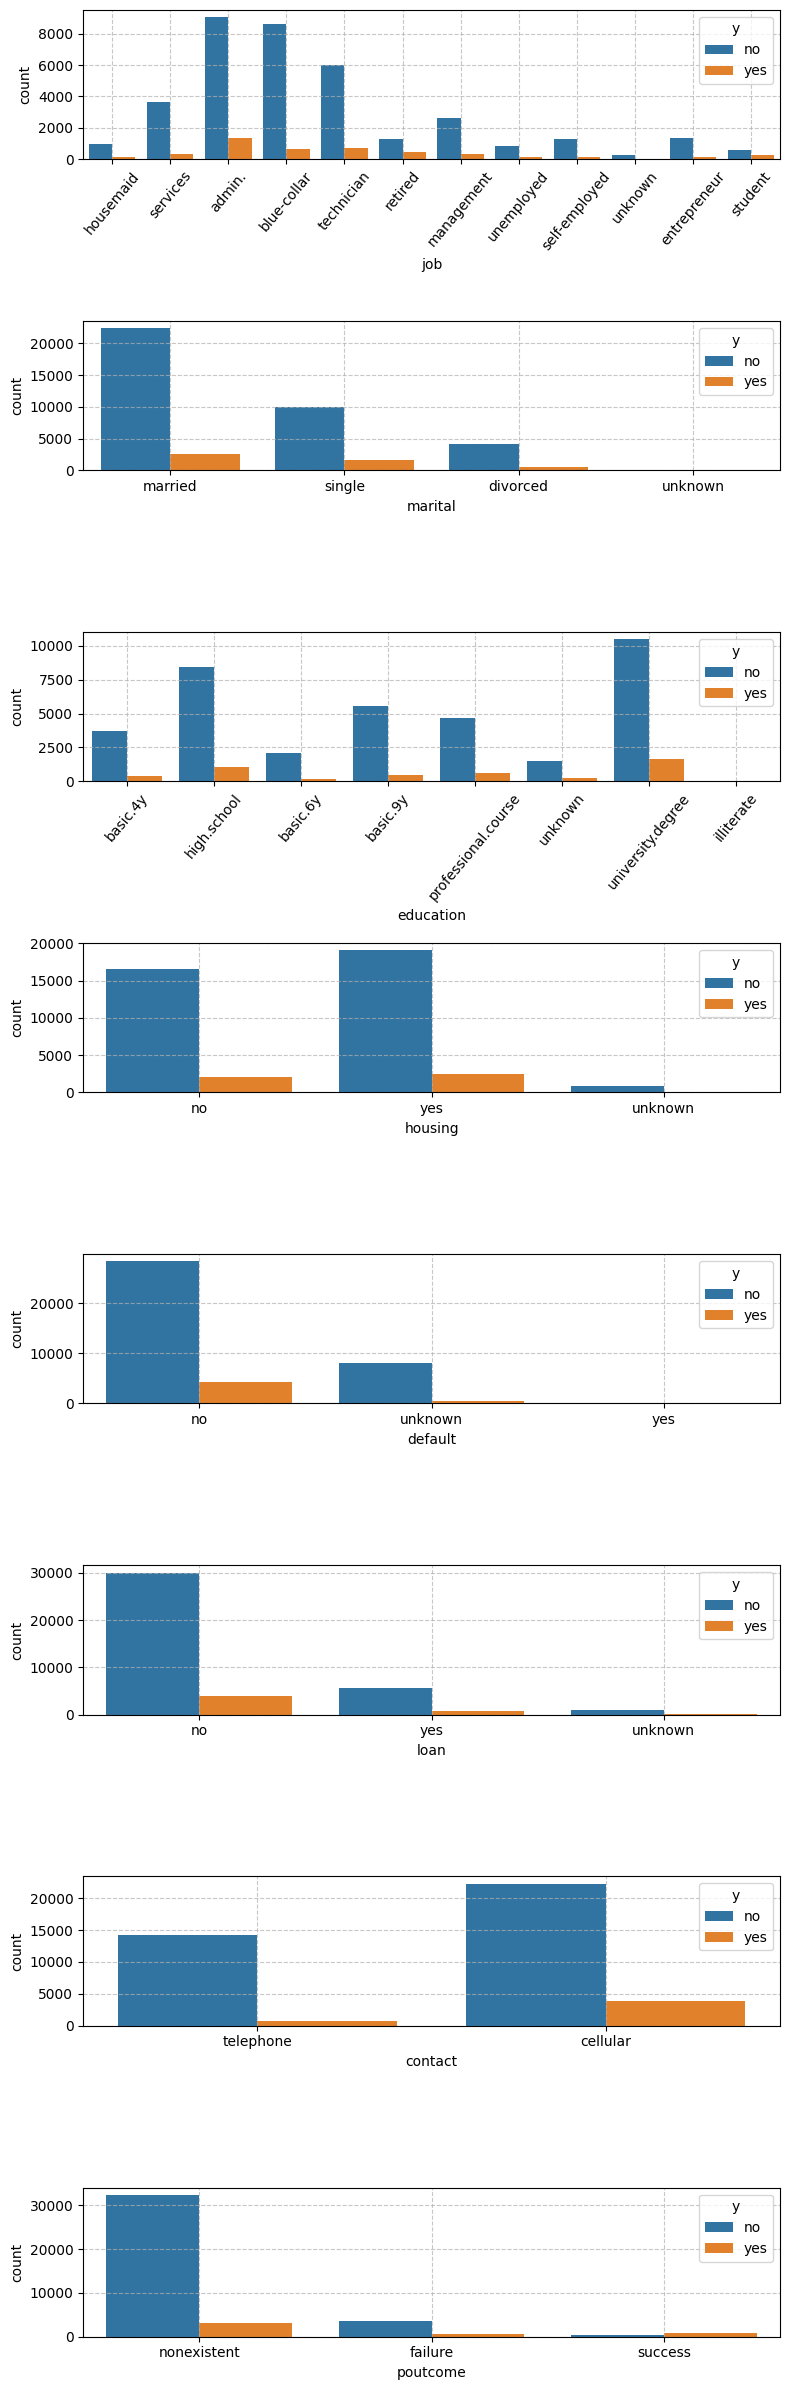

In [37]:

def plot_categorico_categorico(data_set, variables_categoricas):
    
    target = 'y' # Recordar cambiar el target!!!!!!
    
    # Crear la figura con 1 columna y el número necesario de filas
    fig, axis = plt.subplots(len(variables_categoricas), 1, figsize=(8, len(variables_categoricas) * 3))

    # Iterar sobre las columnas categóricas
    for i, col in enumerate(variables_categoricas):
        # Graficar el countplot
        sns.countplot(ax = axis[i], data = data_set, x = col, hue = target)
        axis[i].grid(linestyle='--', alpha=0.7)

        # Contar las categorías en la columna para el siguiente paso. 
        category_counts = data_set[col].value_counts()
        # Si hay más de 20 categorías, eliminar las etiquetas del eje X
        if len(category_counts) > 20: # Si hay más de 20 categorías, eliminar las etiquetas del eje X
            axis[i].set_xticklabels([])
        elif len(category_counts) >= 8:
            for label in axis[i].get_xticklabels(): # Si hay más de 8 categorías pero menos de 20, rotar las etiquetas del eje X
                label.set_rotation(50)

    plt.tight_layout()
    plt.show()

plot_categorico_categorico(data_limpia, categoricas_variables)

**Análisis categorico-categorico**

- **Job**: Los clientes con empleos relacionados con la administracion, tecnicos y trabajos fisicos, son los que mas adquieren el producto. 
- **marital**: Son los clientes casados los que mas adquieren el producto, aunque esta distribuido tambien tre los solteros. Los divorciados casi no adquieren el producto. 
- **Education**: Los clientes con estudios universitarios son significativamente las que mas adquieren el producto 
- **Housing**: Vemos como la diferencia de quien adquiere o no el producto es muy leve pero se inclina hacia el lado de los cleintes que si tiene un prestamo de vivienda. 
- **Loan**: Aqui al contrario que housing , vemos como la diferencia de quien adquiere o no el producto se inclina totalmente hacia el lado de los clientes que no tienen un prestamo personal.  
- **Contact**: La gran mayoria de clientes que contrartan el servicio son contactados por telefono celular y no fijo. 


##### Combinaciones de la clase con varias predictoras

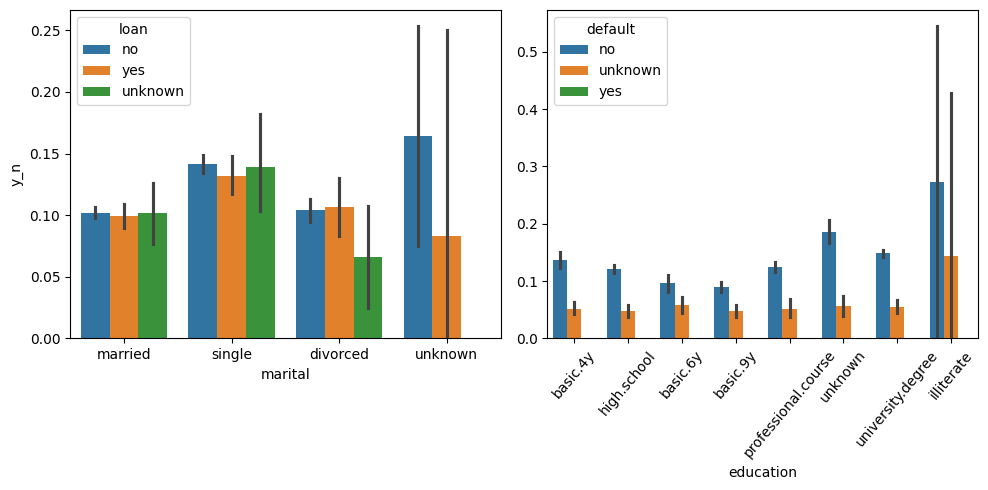

In [72]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(ax = axis[0], data = data_limpia, x = "marital", y = 'y_n', hue = 'loan')

sns.barplot(ax = axis[1], data = data_limpia, x = "education", y = 'y_n', hue = 'default').set(ylabel = None)
for tick in axis[1].get_xticklabels():
    tick.set_rotation(50)

plt.tight_layout()
plt.show()

En este caso no conseguimos ver relaciones significativas al hacer conbinaciones de clases entre variables. 

##### Análisis de correlaciones. 


In [73]:
# Análisis de correlaciones.
categoricas_variables = ['job', 'marital', 'education', 'housing', 'default', 'loan', 'contact', 'poutcome']
# Factorización.

data_limpia["job_n"] = pd.factorize(data_limpia["job"])[0]

data_limpia["marital_n"] = pd.factorize(data_limpia["marital"])[0]

data_limpia["education_n"] = pd.factorize(data_limpia["education"])[0]

data_limpia["housing_n"] = pd.factorize(data_limpia["housing"])[0]

data_limpia["default_n"] = pd.factorize(data_limpia["default"])[0]

data_limpia["loan_n"] = pd.factorize(data_limpia["loan"])[0]

data_limpia["contact_n"] = pd.factorize(data_limpia["contact"])[0]

data_limpia["poutcome_n"] = pd.factorize(data_limpia["poutcome"])[0]

# Meter los cambios de factorizacion en un diccionario para que cuando entren datos nuevos pueda saber que numero le hemos asociado a cada valor en la trasnformacion.

job_transformation_rules = {row["job"]: row["job_n"] for _, row in data_limpia[["job", "job_n"]].drop_duplicates().iterrows()}

marital_transformation_rules = {row["marital"]: row["marital_n"] for _, row in data_limpia[["marital", "marital_n"]].drop_duplicates().iterrows()}

education_transformation_rules = {row["education"]: row["education_n"] for _, row in data_limpia[["education", "education_n"]].drop_duplicates().iterrows()}

housing_transformation_rules = {row["housing"]: row["housing_n"] for _, row in data_limpia[["housing", "housing_n"]].drop_duplicates().iterrows()}

default_transformation_rules = {row["default"]: row["default_n"] for _, row in data_limpia[["default", "default_n"]].drop_duplicates().iterrows()}

loan_transformation_rules = {row["loan"]: row["loan_n"] for _, row in data_limpia[["loan", "loan_n"]].drop_duplicates().iterrows()}

contact_group_transformation_rules = {row["contact"]: row["contact_n"] for _, row in data_limpia[["contact", "contact_n"]].drop_duplicates().iterrows()}

poutcome_transformation_rules = {row["poutcome"]: row["poutcome_n"] for _, row in data_limpia[["poutcome", "poutcome_n"]].drop_duplicates().iterrows()}


# Crea un diccionario que contenga todos los otros diccionarios.

all_transformation_rules = {
    "job": job_transformation_rules,
    "marital": marital_transformation_rules,
    "education": education_transformation_rules,
    "housing": housing_transformation_rules,
    "default": default_transformation_rules,
    "loan": loan_transformation_rules,
    "contact": contact_group_transformation_rules,
    "poutcome": poutcome_transformation_rules
}

# Meter el diccionario en un json para guardarlo y poder disponer de el cuando quiera. 

with open("Transformation_rules.json", "w") as f:
    json.dump(all_transformation_rules, f)

data_limpia.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_n,job_n,marital_n,education_n,housing_n,default_n,loan_n,contact_n,poutcome_n
0,56,housemaid,married,basic.4y,no,no,no,telephone,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1,0,1,0,1,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1,0,1,1,0,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,2,0,2,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1,0,1,0,0,1,0,0


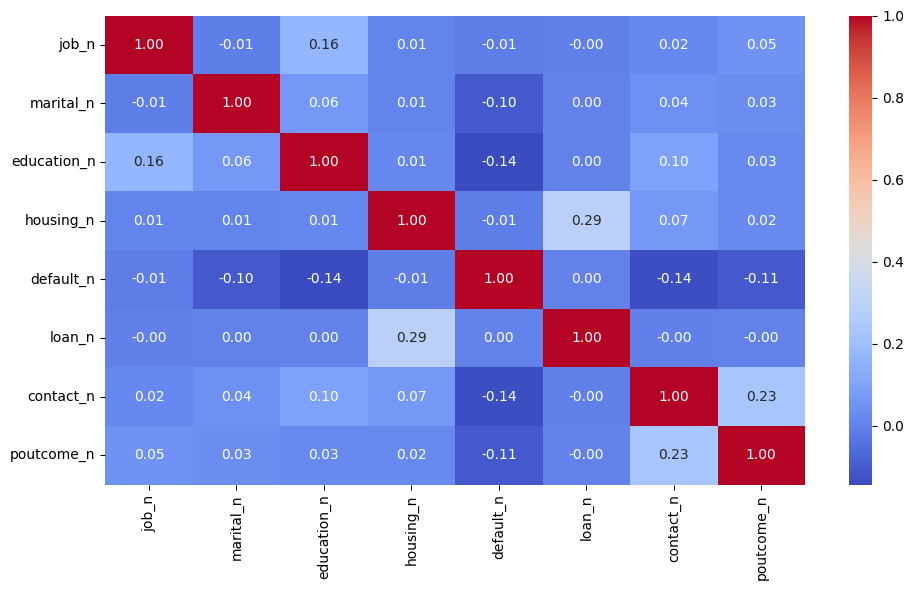

In [79]:
categoricas_variables_factorizadas = ['job_n', 'marital_n', 'education_n', 'housing_n', 'default_n', 'loan_n', 'contact_n', 'poutcome_n']

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(data_limpia[categoricas_variables_factorizadas].corr(), annot = True, fmt = ".2f", cmap = "coolwarm")

plt.tight_layout()

plt.show()

#### Análisis numérico-categórico (completo)

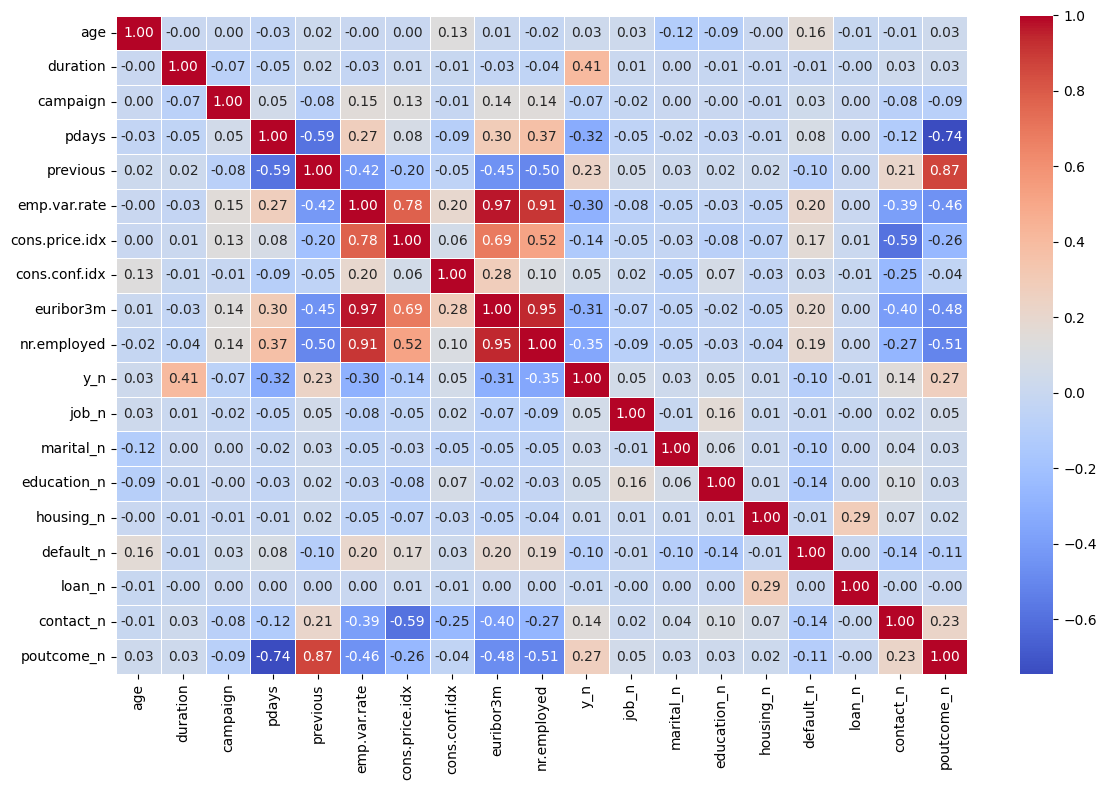

In [78]:
def plot_matriz_correlacion(data_set):

    corr_matrix = data_set.select_dtypes(include = ['number']).corr() # Con esta linea seleccionamos las columnas numericas del dataframe.

    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot = True, fmt = ".2f", linewidths = 0.5, cmap = "coolwarm")

    plt.tight_layout()
    plt.show()

plot_matriz_correlacion(data_limpia)

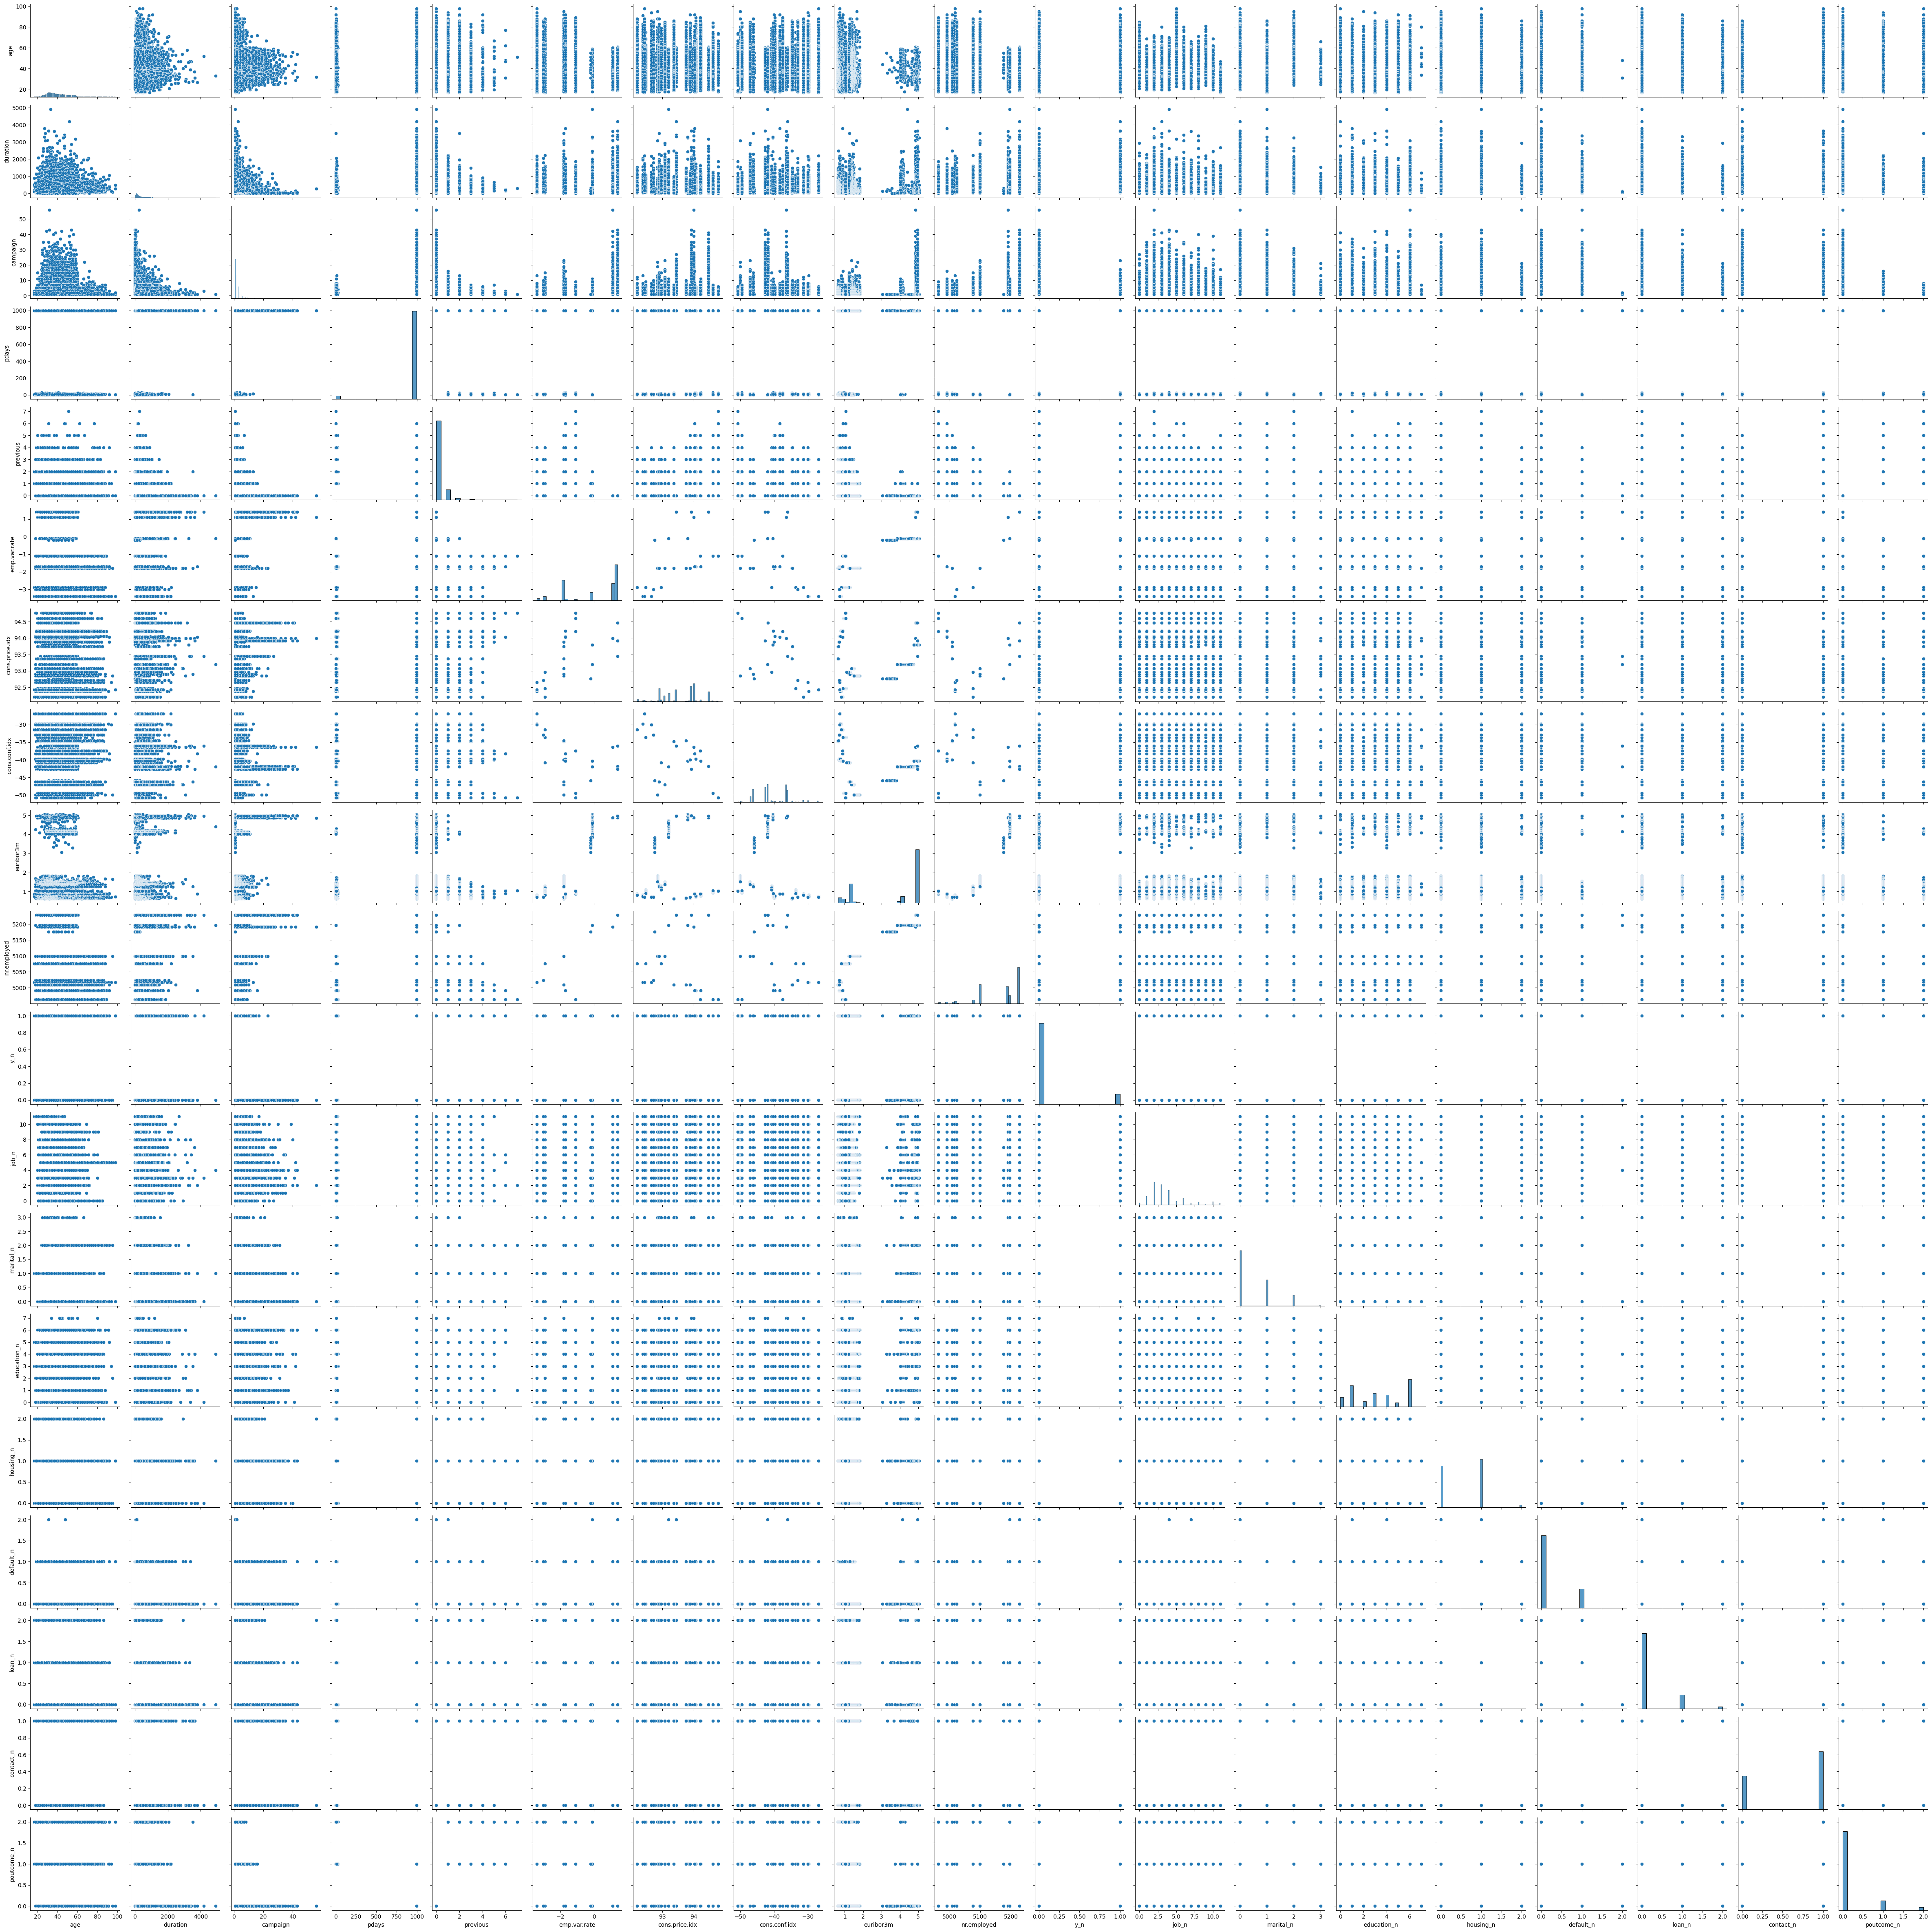

In [80]:
# graficar el pairplot.

sns.pairplot(data = data_limpia)

plt.tight_layout()
plt.show()